This problem I found in [Kaggle's 'Digit Recognizer' competition](https://www.kaggle.com/c/digit-recognizer/data)

#### Import some libraries

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint

#### Import data and set some variables

In [35]:
training_data= pd.read_csv('train.csv')

In [36]:
X=training_data.values[:,1:]
y=(training_data.values[:,0])[:,np.newaxis]

# Find optimal parametrs

<ul>
<li><h4>Here we gonna use onevsall , because we have 10 labels(from 0-9) so it's multiregressional problem<h4></li>
</ul>

In [37]:
def onevsall(X,y,num_labels):
      m,n = X.shape
      out_theta= np.zeros((num_labels,n+1))
      X= np.hstack(  (np.ones((m,1))   ,  X) )
      initial_theta=np.zeros( X.shape[1] )
      count=0
      for i in range(num_labels):
          count+=1
          print('onevsall %s /10   ' %(count))
          new_row =gradientDescent(X,  np.where(y==i,1,0) ,initial_theta, 0.1,800,3 )
          
          out_theta[i,:]=new_row
          
      return out_theta

<ul>
<li><h4>Check global minimum using 'Gradient Descent',so our optimization function will be 'Gradient Descent'<h4></li>
</ul>

In [38]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):

    
    count=0
    for i in range(num_iters):
        count+=1
        
        print('im here graddescent. Its   %s   iteration'%(count))
        
        cost, grad = cost_gradient(theta,X,y,3)
        theta = theta - (alpha * grad)
    
    return theta

In [39]:
def cost_gradient(theta,X,y,lambd):
    
    m = y.size
    

    h = sigmoid(X @ (theta.T))
    

    theta[0] = 0
    
    J = (1 / m) * np.sum(  (-y) @ (np.log(h)) - (1 - y) @ (np.log(1 - h))) + (lambd / (2 * m)) * np.sum(np.square(theta))
    
    grad = (1 / m) * ( X.T  @ (h - y) ) 
    grad = grad + (lambd / m) * theta

        
    return J, grad

In [40]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z) )

<ul>
<li><h4>To avoid the problem of 'log(0)'<h4></li>
</ul> 

In [41]:
def future_scaling(sigma,mu,x):
    return((x-mu)/sigma)

<ul>
<li><h4>Finding values of theta<h4></li>
</ul> 

In [42]:
def opt_theta(a1,y):
    print('now am gonna find Theta1')
    theta1=onevsall(a1,y,10)
    a1=np.hstack( (np.ones((a1.shape[0],1))   , a1) )
    a2=sigmoid(a1 @ theta1.T)
    print('now am gonna find Theta2')
    theta2=onevsall(a2,y,10)
    
    return theta1,theta2

# Set our predict accuracy

In [43]:
def predict(theta1,theta2,X):
    m,n= X.shape[0], X.shape[1]
    
    p= np.zeros((m,1))
    X=np.hstack( (np.ones((m,1))   , X) )
    
    
    a2=sigmoid(X @ theta1.T)
    a2=np.hstack((np.ones((a2.shape[0],1)) , a2  ))
    
    a3= sigmoid(a2 @ theta2.T)
    
    for i in np.arange(m):
        for_picture= a3[i,:]
        put= np.argmax(for_picture)
        p[i]=put
        
    return p

In [44]:
mu=np.mean(X)
sigma=np.std(X)    
X=future_scaling(sigma,mu,X)

In [45]:
y=y.flatten()
theta1,theta2= opt_theta(X,y)

now am gonna find Theta1
onevsall 1 /10   
im here graddescent. Its   1   iteration
im here graddescent. Its   2   iteration
im here graddescent. Its   3   iteration
im here graddescent. Its   4   iteration
im here graddescent. Its   5   iteration
im here graddescent. Its   6   iteration
im here graddescent. Its   7   iteration
im here graddescent. Its   8   iteration
im here graddescent. Its   9   iteration
im here graddescent. Its   10   iteration
im here graddescent. Its   11   iteration
im here graddescent. Its   12   iteration
im here graddescent. Its   13   iteration
im here graddescent. Its   14   iteration
im here graddescent. Its   15   iteration
im here graddescent. Its   16   iteration
im here graddescent. Its   17   iteration
im here graddescent. Its   18   iteration
im here graddescent. Its   19   iteration
im here graddescent. Its   20   iteration
im here graddescent. Its   21   iteration
im here graddescent. Its   22   iteration
im here graddescent. Its   23   iteration


im here graddescent. Its   193   iteration
im here graddescent. Its   194   iteration
im here graddescent. Its   195   iteration
im here graddescent. Its   196   iteration
im here graddescent. Its   197   iteration
im here graddescent. Its   198   iteration
im here graddescent. Its   199   iteration
im here graddescent. Its   200   iteration
im here graddescent. Its   201   iteration
im here graddescent. Its   202   iteration
im here graddescent. Its   203   iteration
im here graddescent. Its   204   iteration
im here graddescent. Its   205   iteration
im here graddescent. Its   206   iteration
im here graddescent. Its   207   iteration
im here graddescent. Its   208   iteration
im here graddescent. Its   209   iteration
im here graddescent. Its   210   iteration
im here graddescent. Its   211   iteration
im here graddescent. Its   212   iteration
im here graddescent. Its   213   iteration
im here graddescent. Its   214   iteration
im here graddescent. Its   215   iteration
im here gra

im here graddescent. Its   384   iteration
im here graddescent. Its   385   iteration
im here graddescent. Its   386   iteration
im here graddescent. Its   387   iteration
im here graddescent. Its   388   iteration
im here graddescent. Its   389   iteration
im here graddescent. Its   390   iteration
im here graddescent. Its   391   iteration
im here graddescent. Its   392   iteration
im here graddescent. Its   393   iteration
im here graddescent. Its   394   iteration
im here graddescent. Its   395   iteration
im here graddescent. Its   396   iteration
im here graddescent. Its   397   iteration
im here graddescent. Its   398   iteration
im here graddescent. Its   399   iteration
im here graddescent. Its   400   iteration
im here graddescent. Its   401   iteration
im here graddescent. Its   402   iteration
im here graddescent. Its   403   iteration
im here graddescent. Its   404   iteration
im here graddescent. Its   405   iteration
im here graddescent. Its   406   iteration
im here gra

im here graddescent. Its   575   iteration
im here graddescent. Its   576   iteration
im here graddescent. Its   577   iteration
im here graddescent. Its   578   iteration
im here graddescent. Its   579   iteration
im here graddescent. Its   580   iteration
im here graddescent. Its   581   iteration
im here graddescent. Its   582   iteration
im here graddescent. Its   583   iteration
im here graddescent. Its   584   iteration
im here graddescent. Its   585   iteration
im here graddescent. Its   586   iteration
im here graddescent. Its   587   iteration
im here graddescent. Its   588   iteration
im here graddescent. Its   589   iteration
im here graddescent. Its   590   iteration
im here graddescent. Its   591   iteration
im here graddescent. Its   592   iteration
im here graddescent. Its   593   iteration
im here graddescent. Its   594   iteration
im here graddescent. Its   595   iteration
im here graddescent. Its   596   iteration
im here graddescent. Its   597   iteration
im here gra

im here graddescent. Its   770   iteration
im here graddescent. Its   771   iteration
im here graddescent. Its   772   iteration
im here graddescent. Its   773   iteration
im here graddescent. Its   774   iteration
im here graddescent. Its   775   iteration
im here graddescent. Its   776   iteration
im here graddescent. Its   777   iteration
im here graddescent. Its   778   iteration
im here graddescent. Its   779   iteration
im here graddescent. Its   780   iteration
im here graddescent. Its   781   iteration
im here graddescent. Its   782   iteration
im here graddescent. Its   783   iteration
im here graddescent. Its   784   iteration
im here graddescent. Its   785   iteration
im here graddescent. Its   786   iteration
im here graddescent. Its   787   iteration
im here graddescent. Its   788   iteration
im here graddescent. Its   789   iteration
im here graddescent. Its   790   iteration
im here graddescent. Its   791   iteration
im here graddescent. Its   792   iteration
im here gra

im here graddescent. Its   168   iteration
im here graddescent. Its   169   iteration
im here graddescent. Its   170   iteration
im here graddescent. Its   171   iteration
im here graddescent. Its   172   iteration
im here graddescent. Its   173   iteration
im here graddescent. Its   174   iteration
im here graddescent. Its   175   iteration
im here graddescent. Its   176   iteration
im here graddescent. Its   177   iteration
im here graddescent. Its   178   iteration
im here graddescent. Its   179   iteration
im here graddescent. Its   180   iteration
im here graddescent. Its   181   iteration
im here graddescent. Its   182   iteration
im here graddescent. Its   183   iteration
im here graddescent. Its   184   iteration
im here graddescent. Its   185   iteration
im here graddescent. Its   186   iteration
im here graddescent. Its   187   iteration
im here graddescent. Its   188   iteration
im here graddescent. Its   189   iteration
im here graddescent. Its   190   iteration
im here gra

im here graddescent. Its   364   iteration
im here graddescent. Its   365   iteration
im here graddescent. Its   366   iteration
im here graddescent. Its   367   iteration
im here graddescent. Its   368   iteration
im here graddescent. Its   369   iteration
im here graddescent. Its   370   iteration
im here graddescent. Its   371   iteration
im here graddescent. Its   372   iteration
im here graddescent. Its   373   iteration
im here graddescent. Its   374   iteration
im here graddescent. Its   375   iteration
im here graddescent. Its   376   iteration
im here graddescent. Its   377   iteration
im here graddescent. Its   378   iteration
im here graddescent. Its   379   iteration
im here graddescent. Its   380   iteration
im here graddescent. Its   381   iteration
im here graddescent. Its   382   iteration
im here graddescent. Its   383   iteration
im here graddescent. Its   384   iteration
im here graddescent. Its   385   iteration
im here graddescent. Its   386   iteration
im here gra

im here graddescent. Its   559   iteration
im here graddescent. Its   560   iteration
im here graddescent. Its   561   iteration
im here graddescent. Its   562   iteration
im here graddescent. Its   563   iteration
im here graddescent. Its   564   iteration
im here graddescent. Its   565   iteration
im here graddescent. Its   566   iteration
im here graddescent. Its   567   iteration
im here graddescent. Its   568   iteration
im here graddescent. Its   569   iteration
im here graddescent. Its   570   iteration
im here graddescent. Its   571   iteration
im here graddescent. Its   572   iteration
im here graddescent. Its   573   iteration
im here graddescent. Its   574   iteration
im here graddescent. Its   575   iteration
im here graddescent. Its   576   iteration
im here graddescent. Its   577   iteration
im here graddescent. Its   578   iteration
im here graddescent. Its   579   iteration
im here graddescent. Its   580   iteration
im here graddescent. Its   581   iteration
im here gra

im here graddescent. Its   755   iteration
im here graddescent. Its   756   iteration
im here graddescent. Its   757   iteration
im here graddescent. Its   758   iteration
im here graddescent. Its   759   iteration
im here graddescent. Its   760   iteration
im here graddescent. Its   761   iteration
im here graddescent. Its   762   iteration
im here graddescent. Its   763   iteration
im here graddescent. Its   764   iteration
im here graddescent. Its   765   iteration
im here graddescent. Its   766   iteration
im here graddescent. Its   767   iteration
im here graddescent. Its   768   iteration
im here graddescent. Its   769   iteration
im here graddescent. Its   770   iteration
im here graddescent. Its   771   iteration
im here graddescent. Its   772   iteration
im here graddescent. Its   773   iteration
im here graddescent. Its   774   iteration
im here graddescent. Its   775   iteration
im here graddescent. Its   776   iteration
im here graddescent. Its   777   iteration
im here gra

im here graddescent. Its   149   iteration
im here graddescent. Its   150   iteration
im here graddescent. Its   151   iteration
im here graddescent. Its   152   iteration
im here graddescent. Its   153   iteration
im here graddescent. Its   154   iteration
im here graddescent. Its   155   iteration
im here graddescent. Its   156   iteration
im here graddescent. Its   157   iteration
im here graddescent. Its   158   iteration
im here graddescent. Its   159   iteration
im here graddescent. Its   160   iteration
im here graddescent. Its   161   iteration
im here graddescent. Its   162   iteration
im here graddescent. Its   163   iteration
im here graddescent. Its   164   iteration
im here graddescent. Its   165   iteration
im here graddescent. Its   166   iteration
im here graddescent. Its   167   iteration
im here graddescent. Its   168   iteration
im here graddescent. Its   169   iteration
im here graddescent. Its   170   iteration
im here graddescent. Its   171   iteration
im here gra

im here graddescent. Its   342   iteration
im here graddescent. Its   343   iteration
im here graddescent. Its   344   iteration
im here graddescent. Its   345   iteration
im here graddescent. Its   346   iteration
im here graddescent. Its   347   iteration
im here graddescent. Its   348   iteration
im here graddescent. Its   349   iteration
im here graddescent. Its   350   iteration
im here graddescent. Its   351   iteration
im here graddescent. Its   352   iteration
im here graddescent. Its   353   iteration
im here graddescent. Its   354   iteration
im here graddescent. Its   355   iteration
im here graddescent. Its   356   iteration
im here graddescent. Its   357   iteration
im here graddescent. Its   358   iteration
im here graddescent. Its   359   iteration
im here graddescent. Its   360   iteration
im here graddescent. Its   361   iteration
im here graddescent. Its   362   iteration
im here graddescent. Its   363   iteration
im here graddescent. Its   364   iteration
im here gra

im here graddescent. Its   536   iteration
im here graddescent. Its   537   iteration
im here graddescent. Its   538   iteration
im here graddescent. Its   539   iteration
im here graddescent. Its   540   iteration
im here graddescent. Its   541   iteration
im here graddescent. Its   542   iteration
im here graddescent. Its   543   iteration
im here graddescent. Its   544   iteration
im here graddescent. Its   545   iteration
im here graddescent. Its   546   iteration
im here graddescent. Its   547   iteration
im here graddescent. Its   548   iteration
im here graddescent. Its   549   iteration
im here graddescent. Its   550   iteration
im here graddescent. Its   551   iteration
im here graddescent. Its   552   iteration
im here graddescent. Its   553   iteration
im here graddescent. Its   554   iteration
im here graddescent. Its   555   iteration
im here graddescent. Its   556   iteration
im here graddescent. Its   557   iteration
im here graddescent. Its   558   iteration
im here gra

im here graddescent. Its   731   iteration
im here graddescent. Its   732   iteration
im here graddescent. Its   733   iteration
im here graddescent. Its   734   iteration
im here graddescent. Its   735   iteration
im here graddescent. Its   736   iteration
im here graddescent. Its   737   iteration
im here graddescent. Its   738   iteration
im here graddescent. Its   739   iteration
im here graddescent. Its   740   iteration
im here graddescent. Its   741   iteration
im here graddescent. Its   742   iteration
im here graddescent. Its   743   iteration
im here graddescent. Its   744   iteration
im here graddescent. Its   745   iteration
im here graddescent. Its   746   iteration
im here graddescent. Its   747   iteration
im here graddescent. Its   748   iteration
im here graddescent. Its   749   iteration
im here graddescent. Its   750   iteration
im here graddescent. Its   751   iteration
im here graddescent. Its   752   iteration
im here graddescent. Its   753   iteration
im here gra

im here graddescent. Its   128   iteration
im here graddescent. Its   129   iteration
im here graddescent. Its   130   iteration
im here graddescent. Its   131   iteration
im here graddescent. Its   132   iteration
im here graddescent. Its   133   iteration
im here graddescent. Its   134   iteration
im here graddescent. Its   135   iteration
im here graddescent. Its   136   iteration
im here graddescent. Its   137   iteration
im here graddescent. Its   138   iteration
im here graddescent. Its   139   iteration
im here graddescent. Its   140   iteration
im here graddescent. Its   141   iteration
im here graddescent. Its   142   iteration
im here graddescent. Its   143   iteration
im here graddescent. Its   144   iteration
im here graddescent. Its   145   iteration
im here graddescent. Its   146   iteration
im here graddescent. Its   147   iteration
im here graddescent. Its   148   iteration
im here graddescent. Its   149   iteration
im here graddescent. Its   150   iteration
im here gra

im here graddescent. Its   320   iteration
im here graddescent. Its   321   iteration
im here graddescent. Its   322   iteration
im here graddescent. Its   323   iteration
im here graddescent. Its   324   iteration
im here graddescent. Its   325   iteration
im here graddescent. Its   326   iteration
im here graddescent. Its   327   iteration
im here graddescent. Its   328   iteration
im here graddescent. Its   329   iteration
im here graddescent. Its   330   iteration
im here graddescent. Its   331   iteration
im here graddescent. Its   332   iteration
im here graddescent. Its   333   iteration
im here graddescent. Its   334   iteration
im here graddescent. Its   335   iteration
im here graddescent. Its   336   iteration
im here graddescent. Its   337   iteration
im here graddescent. Its   338   iteration
im here graddescent. Its   339   iteration
im here graddescent. Its   340   iteration
im here graddescent. Its   341   iteration
im here graddescent. Its   342   iteration
im here gra

im here graddescent. Its   512   iteration
im here graddescent. Its   513   iteration
im here graddescent. Its   514   iteration
im here graddescent. Its   515   iteration
im here graddescent. Its   516   iteration
im here graddescent. Its   517   iteration
im here graddescent. Its   518   iteration
im here graddescent. Its   519   iteration
im here graddescent. Its   520   iteration
im here graddescent. Its   521   iteration
im here graddescent. Its   522   iteration
im here graddescent. Its   523   iteration
im here graddescent. Its   524   iteration
im here graddescent. Its   525   iteration
im here graddescent. Its   526   iteration
im here graddescent. Its   527   iteration
im here graddescent. Its   528   iteration
im here graddescent. Its   529   iteration
im here graddescent. Its   530   iteration
im here graddescent. Its   531   iteration
im here graddescent. Its   532   iteration
im here graddescent. Its   533   iteration
im here graddescent. Its   534   iteration
im here gra

im here graddescent. Its   706   iteration
im here graddescent. Its   707   iteration
im here graddescent. Its   708   iteration
im here graddescent. Its   709   iteration
im here graddescent. Its   710   iteration
im here graddescent. Its   711   iteration
im here graddescent. Its   712   iteration
im here graddescent. Its   713   iteration
im here graddescent. Its   714   iteration
im here graddescent. Its   715   iteration
im here graddescent. Its   716   iteration
im here graddescent. Its   717   iteration
im here graddescent. Its   718   iteration
im here graddescent. Its   719   iteration
im here graddescent. Its   720   iteration
im here graddescent. Its   721   iteration
im here graddescent. Its   722   iteration
im here graddescent. Its   723   iteration
im here graddescent. Its   724   iteration
im here graddescent. Its   725   iteration
im here graddescent. Its   726   iteration
im here graddescent. Its   727   iteration
im here graddescent. Its   728   iteration
im here gra

im here graddescent. Its   99   iteration
im here graddescent. Its   100   iteration
im here graddescent. Its   101   iteration
im here graddescent. Its   102   iteration
im here graddescent. Its   103   iteration
im here graddescent. Its   104   iteration
im here graddescent. Its   105   iteration
im here graddescent. Its   106   iteration
im here graddescent. Its   107   iteration
im here graddescent. Its   108   iteration
im here graddescent. Its   109   iteration
im here graddescent. Its   110   iteration
im here graddescent. Its   111   iteration
im here graddescent. Its   112   iteration
im here graddescent. Its   113   iteration
im here graddescent. Its   114   iteration
im here graddescent. Its   115   iteration
im here graddescent. Its   116   iteration
im here graddescent. Its   117   iteration
im here graddescent. Its   118   iteration
im here graddescent. Its   119   iteration
im here graddescent. Its   120   iteration
im here graddescent. Its   121   iteration
im here grad

im here graddescent. Its   293   iteration
im here graddescent. Its   294   iteration
im here graddescent. Its   295   iteration
im here graddescent. Its   296   iteration
im here graddescent. Its   297   iteration
im here graddescent. Its   298   iteration
im here graddescent. Its   299   iteration
im here graddescent. Its   300   iteration
im here graddescent. Its   301   iteration
im here graddescent. Its   302   iteration
im here graddescent. Its   303   iteration
im here graddescent. Its   304   iteration
im here graddescent. Its   305   iteration
im here graddescent. Its   306   iteration
im here graddescent. Its   307   iteration
im here graddescent. Its   308   iteration
im here graddescent. Its   309   iteration
im here graddescent. Its   310   iteration
im here graddescent. Its   311   iteration
im here graddescent. Its   312   iteration
im here graddescent. Its   313   iteration
im here graddescent. Its   314   iteration
im here graddescent. Its   315   iteration
im here gra

im here graddescent. Its   486   iteration
im here graddescent. Its   487   iteration
im here graddescent. Its   488   iteration
im here graddescent. Its   489   iteration
im here graddescent. Its   490   iteration
im here graddescent. Its   491   iteration
im here graddescent. Its   492   iteration
im here graddescent. Its   493   iteration
im here graddescent. Its   494   iteration
im here graddescent. Its   495   iteration
im here graddescent. Its   496   iteration
im here graddescent. Its   497   iteration
im here graddescent. Its   498   iteration
im here graddescent. Its   499   iteration
im here graddescent. Its   500   iteration
im here graddescent. Its   501   iteration
im here graddescent. Its   502   iteration
im here graddescent. Its   503   iteration
im here graddescent. Its   504   iteration
im here graddescent. Its   505   iteration
im here graddescent. Its   506   iteration
im here graddescent. Its   507   iteration
im here graddescent. Its   508   iteration
im here gra

im here graddescent. Its   679   iteration
im here graddescent. Its   680   iteration
im here graddescent. Its   681   iteration
im here graddescent. Its   682   iteration
im here graddescent. Its   683   iteration
im here graddescent. Its   684   iteration
im here graddescent. Its   685   iteration
im here graddescent. Its   686   iteration
im here graddescent. Its   687   iteration
im here graddescent. Its   688   iteration
im here graddescent. Its   689   iteration
im here graddescent. Its   690   iteration
im here graddescent. Its   691   iteration
im here graddescent. Its   692   iteration
im here graddescent. Its   693   iteration
im here graddescent. Its   694   iteration
im here graddescent. Its   695   iteration
im here graddescent. Its   696   iteration
im here graddescent. Its   697   iteration
im here graddescent. Its   698   iteration
im here graddescent. Its   699   iteration
im here graddescent. Its   700   iteration
im here graddescent. Its   701   iteration
im here gra

im here graddescent. Its   75   iteration
im here graddescent. Its   76   iteration
im here graddescent. Its   77   iteration
im here graddescent. Its   78   iteration
im here graddescent. Its   79   iteration
im here graddescent. Its   80   iteration
im here graddescent. Its   81   iteration
im here graddescent. Its   82   iteration
im here graddescent. Its   83   iteration
im here graddescent. Its   84   iteration
im here graddescent. Its   85   iteration
im here graddescent. Its   86   iteration
im here graddescent. Its   87   iteration
im here graddescent. Its   88   iteration
im here graddescent. Its   89   iteration
im here graddescent. Its   90   iteration
im here graddescent. Its   91   iteration
im here graddescent. Its   92   iteration
im here graddescent. Its   93   iteration
im here graddescent. Its   94   iteration
im here graddescent. Its   95   iteration
im here graddescent. Its   96   iteration
im here graddescent. Its   97   iteration
im here graddescent. Its   98   it

im here graddescent. Its   269   iteration
im here graddescent. Its   270   iteration
im here graddescent. Its   271   iteration
im here graddescent. Its   272   iteration
im here graddescent. Its   273   iteration
im here graddescent. Its   274   iteration
im here graddescent. Its   275   iteration
im here graddescent. Its   276   iteration
im here graddescent. Its   277   iteration
im here graddescent. Its   278   iteration
im here graddescent. Its   279   iteration
im here graddescent. Its   280   iteration
im here graddescent. Its   281   iteration
im here graddescent. Its   282   iteration
im here graddescent. Its   283   iteration
im here graddescent. Its   284   iteration
im here graddescent. Its   285   iteration
im here graddescent. Its   286   iteration
im here graddescent. Its   287   iteration
im here graddescent. Its   288   iteration
im here graddescent. Its   289   iteration
im here graddescent. Its   290   iteration
im here graddescent. Its   291   iteration
im here gra

im here graddescent. Its   463   iteration
im here graddescent. Its   464   iteration
im here graddescent. Its   465   iteration
im here graddescent. Its   466   iteration
im here graddescent. Its   467   iteration
im here graddescent. Its   468   iteration
im here graddescent. Its   469   iteration
im here graddescent. Its   470   iteration
im here graddescent. Its   471   iteration
im here graddescent. Its   472   iteration
im here graddescent. Its   473   iteration
im here graddescent. Its   474   iteration
im here graddescent. Its   475   iteration
im here graddescent. Its   476   iteration
im here graddescent. Its   477   iteration
im here graddescent. Its   478   iteration
im here graddescent. Its   479   iteration
im here graddescent. Its   480   iteration
im here graddescent. Its   481   iteration
im here graddescent. Its   482   iteration
im here graddescent. Its   483   iteration
im here graddescent. Its   484   iteration
im here graddescent. Its   485   iteration
im here gra

im here graddescent. Its   656   iteration
im here graddescent. Its   657   iteration
im here graddescent. Its   658   iteration
im here graddescent. Its   659   iteration
im here graddescent. Its   660   iteration
im here graddescent. Its   661   iteration
im here graddescent. Its   662   iteration
im here graddescent. Its   663   iteration
im here graddescent. Its   664   iteration
im here graddescent. Its   665   iteration
im here graddescent. Its   666   iteration
im here graddescent. Its   667   iteration
im here graddescent. Its   668   iteration
im here graddescent. Its   669   iteration
im here graddescent. Its   670   iteration
im here graddescent. Its   671   iteration
im here graddescent. Its   672   iteration
im here graddescent. Its   673   iteration
im here graddescent. Its   674   iteration
im here graddescent. Its   675   iteration
im here graddescent. Its   676   iteration
im here graddescent. Its   677   iteration
im here graddescent. Its   678   iteration
im here gra

im here graddescent. Its   51   iteration
im here graddescent. Its   52   iteration
im here graddescent. Its   53   iteration
im here graddescent. Its   54   iteration
im here graddescent. Its   55   iteration
im here graddescent. Its   56   iteration
im here graddescent. Its   57   iteration
im here graddescent. Its   58   iteration
im here graddescent. Its   59   iteration
im here graddescent. Its   60   iteration
im here graddescent. Its   61   iteration
im here graddescent. Its   62   iteration
im here graddescent. Its   63   iteration
im here graddescent. Its   64   iteration
im here graddescent. Its   65   iteration
im here graddescent. Its   66   iteration
im here graddescent. Its   67   iteration
im here graddescent. Its   68   iteration
im here graddescent. Its   69   iteration
im here graddescent. Its   70   iteration
im here graddescent. Its   71   iteration
im here graddescent. Its   72   iteration
im here graddescent. Its   73   iteration
im here graddescent. Its   74   it

im here graddescent. Its   243   iteration
im here graddescent. Its   244   iteration
im here graddescent. Its   245   iteration
im here graddescent. Its   246   iteration
im here graddescent. Its   247   iteration
im here graddescent. Its   248   iteration
im here graddescent. Its   249   iteration
im here graddescent. Its   250   iteration
im here graddescent. Its   251   iteration
im here graddescent. Its   252   iteration
im here graddescent. Its   253   iteration
im here graddescent. Its   254   iteration
im here graddescent. Its   255   iteration
im here graddescent. Its   256   iteration
im here graddescent. Its   257   iteration
im here graddescent. Its   258   iteration
im here graddescent. Its   259   iteration
im here graddescent. Its   260   iteration
im here graddescent. Its   261   iteration
im here graddescent. Its   262   iteration
im here graddescent. Its   263   iteration
im here graddescent. Its   264   iteration
im here graddescent. Its   265   iteration
im here gra

im here graddescent. Its   434   iteration
im here graddescent. Its   435   iteration
im here graddescent. Its   436   iteration
im here graddescent. Its   437   iteration
im here graddescent. Its   438   iteration
im here graddescent. Its   439   iteration
im here graddescent. Its   440   iteration
im here graddescent. Its   441   iteration
im here graddescent. Its   442   iteration
im here graddescent. Its   443   iteration
im here graddescent. Its   444   iteration
im here graddescent. Its   445   iteration
im here graddescent. Its   446   iteration
im here graddescent. Its   447   iteration
im here graddescent. Its   448   iteration
im here graddescent. Its   449   iteration
im here graddescent. Its   450   iteration
im here graddescent. Its   451   iteration
im here graddescent. Its   452   iteration
im here graddescent. Its   453   iteration
im here graddescent. Its   454   iteration
im here graddescent. Its   455   iteration
im here graddescent. Its   456   iteration
im here gra

im here graddescent. Its   629   iteration
im here graddescent. Its   630   iteration
im here graddescent. Its   631   iteration
im here graddescent. Its   632   iteration
im here graddescent. Its   633   iteration
im here graddescent. Its   634   iteration
im here graddescent. Its   635   iteration
im here graddescent. Its   636   iteration
im here graddescent. Its   637   iteration
im here graddescent. Its   638   iteration
im here graddescent. Its   639   iteration
im here graddescent. Its   640   iteration
im here graddescent. Its   641   iteration
im here graddescent. Its   642   iteration
im here graddescent. Its   643   iteration
im here graddescent. Its   644   iteration
im here graddescent. Its   645   iteration
im here graddescent. Its   646   iteration
im here graddescent. Its   647   iteration
im here graddescent. Its   648   iteration
im here graddescent. Its   649   iteration
im here graddescent. Its   650   iteration
im here graddescent. Its   651   iteration
im here gra

im here graddescent. Its   21   iteration
im here graddescent. Its   22   iteration
im here graddescent. Its   23   iteration
im here graddescent. Its   24   iteration
im here graddescent. Its   25   iteration
im here graddescent. Its   26   iteration
im here graddescent. Its   27   iteration
im here graddescent. Its   28   iteration
im here graddescent. Its   29   iteration
im here graddescent. Its   30   iteration
im here graddescent. Its   31   iteration
im here graddescent. Its   32   iteration
im here graddescent. Its   33   iteration
im here graddescent. Its   34   iteration
im here graddescent. Its   35   iteration
im here graddescent. Its   36   iteration
im here graddescent. Its   37   iteration
im here graddescent. Its   38   iteration
im here graddescent. Its   39   iteration
im here graddescent. Its   40   iteration
im here graddescent. Its   41   iteration
im here graddescent. Its   42   iteration
im here graddescent. Its   43   iteration
im here graddescent. Its   44   it

im here graddescent. Its   215   iteration
im here graddescent. Its   216   iteration
im here graddescent. Its   217   iteration
im here graddescent. Its   218   iteration
im here graddescent. Its   219   iteration
im here graddescent. Its   220   iteration
im here graddescent. Its   221   iteration
im here graddescent. Its   222   iteration
im here graddescent. Its   223   iteration
im here graddescent. Its   224   iteration
im here graddescent. Its   225   iteration
im here graddescent. Its   226   iteration
im here graddescent. Its   227   iteration
im here graddescent. Its   228   iteration
im here graddescent. Its   229   iteration
im here graddescent. Its   230   iteration
im here graddescent. Its   231   iteration
im here graddescent. Its   232   iteration
im here graddescent. Its   233   iteration
im here graddescent. Its   234   iteration
im here graddescent. Its   235   iteration
im here graddescent. Its   236   iteration
im here graddescent. Its   237   iteration
im here gra

im here graddescent. Its   409   iteration
im here graddescent. Its   410   iteration
im here graddescent. Its   411   iteration
im here graddescent. Its   412   iteration
im here graddescent. Its   413   iteration
im here graddescent. Its   414   iteration
im here graddescent. Its   415   iteration
im here graddescent. Its   416   iteration
im here graddescent. Its   417   iteration
im here graddescent. Its   418   iteration
im here graddescent. Its   419   iteration
im here graddescent. Its   420   iteration
im here graddescent. Its   421   iteration
im here graddescent. Its   422   iteration
im here graddescent. Its   423   iteration
im here graddescent. Its   424   iteration
im here graddescent. Its   425   iteration
im here graddescent. Its   426   iteration
im here graddescent. Its   427   iteration
im here graddescent. Its   428   iteration
im here graddescent. Its   429   iteration
im here graddescent. Its   430   iteration
im here graddescent. Its   431   iteration
im here gra

im here graddescent. Its   605   iteration
im here graddescent. Its   606   iteration
im here graddescent. Its   607   iteration
im here graddescent. Its   608   iteration
im here graddescent. Its   609   iteration
im here graddescent. Its   610   iteration
im here graddescent. Its   611   iteration
im here graddescent. Its   612   iteration
im here graddescent. Its   613   iteration
im here graddescent. Its   614   iteration
im here graddescent. Its   615   iteration
im here graddescent. Its   616   iteration
im here graddescent. Its   617   iteration
im here graddescent. Its   618   iteration
im here graddescent. Its   619   iteration
im here graddescent. Its   620   iteration
im here graddescent. Its   621   iteration
im here graddescent. Its   622   iteration
im here graddescent. Its   623   iteration
im here graddescent. Its   624   iteration
im here graddescent. Its   625   iteration
im here graddescent. Its   626   iteration
im here graddescent. Its   627   iteration
im here gra

im here graddescent. Its   798   iteration
im here graddescent. Its   799   iteration
im here graddescent. Its   800   iteration
onevsall 9 /10   
im here graddescent. Its   1   iteration
im here graddescent. Its   2   iteration
im here graddescent. Its   3   iteration
im here graddescent. Its   4   iteration
im here graddescent. Its   5   iteration
im here graddescent. Its   6   iteration
im here graddescent. Its   7   iteration
im here graddescent. Its   8   iteration
im here graddescent. Its   9   iteration
im here graddescent. Its   10   iteration
im here graddescent. Its   11   iteration
im here graddescent. Its   12   iteration
im here graddescent. Its   13   iteration
im here graddescent. Its   14   iteration
im here graddescent. Its   15   iteration
im here graddescent. Its   16   iteration
im here graddescent. Its   17   iteration
im here graddescent. Its   18   iteration
im here graddescent. Its   19   iteration
im here graddescent. Its   20   iteration
im here graddescent. I

im here graddescent. Its   195   iteration
im here graddescent. Its   196   iteration
im here graddescent. Its   197   iteration
im here graddescent. Its   198   iteration
im here graddescent. Its   199   iteration
im here graddescent. Its   200   iteration
im here graddescent. Its   201   iteration
im here graddescent. Its   202   iteration
im here graddescent. Its   203   iteration
im here graddescent. Its   204   iteration
im here graddescent. Its   205   iteration
im here graddescent. Its   206   iteration
im here graddescent. Its   207   iteration
im here graddescent. Its   208   iteration
im here graddescent. Its   209   iteration
im here graddescent. Its   210   iteration
im here graddescent. Its   211   iteration
im here graddescent. Its   212   iteration
im here graddescent. Its   213   iteration
im here graddescent. Its   214   iteration
im here graddescent. Its   215   iteration
im here graddescent. Its   216   iteration
im here graddescent. Its   217   iteration
im here gra

im here graddescent. Its   387   iteration
im here graddescent. Its   388   iteration
im here graddescent. Its   389   iteration
im here graddescent. Its   390   iteration
im here graddescent. Its   391   iteration
im here graddescent. Its   392   iteration
im here graddescent. Its   393   iteration
im here graddescent. Its   394   iteration
im here graddescent. Its   395   iteration
im here graddescent. Its   396   iteration
im here graddescent. Its   397   iteration
im here graddescent. Its   398   iteration
im here graddescent. Its   399   iteration
im here graddescent. Its   400   iteration
im here graddescent. Its   401   iteration
im here graddescent. Its   402   iteration
im here graddescent. Its   403   iteration
im here graddescent. Its   404   iteration
im here graddescent. Its   405   iteration
im here graddescent. Its   406   iteration
im here graddescent. Its   407   iteration
im here graddescent. Its   408   iteration
im here graddescent. Its   409   iteration
im here gra

im here graddescent. Its   578   iteration
im here graddescent. Its   579   iteration
im here graddescent. Its   580   iteration
im here graddescent. Its   581   iteration
im here graddescent. Its   582   iteration
im here graddescent. Its   583   iteration
im here graddescent. Its   584   iteration
im here graddescent. Its   585   iteration
im here graddescent. Its   586   iteration
im here graddescent. Its   587   iteration
im here graddescent. Its   588   iteration
im here graddescent. Its   589   iteration
im here graddescent. Its   590   iteration
im here graddescent. Its   591   iteration
im here graddescent. Its   592   iteration
im here graddescent. Its   593   iteration
im here graddescent. Its   594   iteration
im here graddescent. Its   595   iteration
im here graddescent. Its   596   iteration
im here graddescent. Its   597   iteration
im here graddescent. Its   598   iteration
im here graddescent. Its   599   iteration
im here graddescent. Its   600   iteration
im here gra

im here graddescent. Its   772   iteration
im here graddescent. Its   773   iteration
im here graddescent. Its   774   iteration
im here graddescent. Its   775   iteration
im here graddescent. Its   776   iteration
im here graddescent. Its   777   iteration
im here graddescent. Its   778   iteration
im here graddescent. Its   779   iteration
im here graddescent. Its   780   iteration
im here graddescent. Its   781   iteration
im here graddescent. Its   782   iteration
im here graddescent. Its   783   iteration
im here graddescent. Its   784   iteration
im here graddescent. Its   785   iteration
im here graddescent. Its   786   iteration
im here graddescent. Its   787   iteration
im here graddescent. Its   788   iteration
im here graddescent. Its   789   iteration
im here graddescent. Its   790   iteration
im here graddescent. Its   791   iteration
im here graddescent. Its   792   iteration
im here graddescent. Its   793   iteration
im here graddescent. Its   794   iteration
im here gra

im here graddescent. Its   165   iteration
im here graddescent. Its   166   iteration
im here graddescent. Its   167   iteration
im here graddescent. Its   168   iteration
im here graddescent. Its   169   iteration
im here graddescent. Its   170   iteration
im here graddescent. Its   171   iteration
im here graddescent. Its   172   iteration
im here graddescent. Its   173   iteration
im here graddescent. Its   174   iteration
im here graddescent. Its   175   iteration
im here graddescent. Its   176   iteration
im here graddescent. Its   177   iteration
im here graddescent. Its   178   iteration
im here graddescent. Its   179   iteration
im here graddescent. Its   180   iteration
im here graddescent. Its   181   iteration
im here graddescent. Its   182   iteration
im here graddescent. Its   183   iteration
im here graddescent. Its   184   iteration
im here graddescent. Its   185   iteration
im here graddescent. Its   186   iteration
im here graddescent. Its   187   iteration
im here gra

im here graddescent. Its   356   iteration
im here graddescent. Its   357   iteration
im here graddescent. Its   358   iteration
im here graddescent. Its   359   iteration
im here graddescent. Its   360   iteration
im here graddescent. Its   361   iteration
im here graddescent. Its   362   iteration
im here graddescent. Its   363   iteration
im here graddescent. Its   364   iteration
im here graddescent. Its   365   iteration
im here graddescent. Its   366   iteration
im here graddescent. Its   367   iteration
im here graddescent. Its   368   iteration
im here graddescent. Its   369   iteration
im here graddescent. Its   370   iteration
im here graddescent. Its   371   iteration
im here graddescent. Its   372   iteration
im here graddescent. Its   373   iteration
im here graddescent. Its   374   iteration
im here graddescent. Its   375   iteration
im here graddescent. Its   376   iteration
im here graddescent. Its   377   iteration
im here graddescent. Its   378   iteration
im here gra

im here graddescent. Its   551   iteration
im here graddescent. Its   552   iteration
im here graddescent. Its   553   iteration
im here graddescent. Its   554   iteration
im here graddescent. Its   555   iteration
im here graddescent. Its   556   iteration
im here graddescent. Its   557   iteration
im here graddescent. Its   558   iteration
im here graddescent. Its   559   iteration
im here graddescent. Its   560   iteration
im here graddescent. Its   561   iteration
im here graddescent. Its   562   iteration
im here graddescent. Its   563   iteration
im here graddescent. Its   564   iteration
im here graddescent. Its   565   iteration
im here graddescent. Its   566   iteration
im here graddescent. Its   567   iteration
im here graddescent. Its   568   iteration
im here graddescent. Its   569   iteration
im here graddescent. Its   570   iteration
im here graddescent. Its   571   iteration
im here graddescent. Its   572   iteration
im here graddescent. Its   573   iteration
im here gra

im here graddescent. Its   748   iteration
im here graddescent. Its   749   iteration
im here graddescent. Its   750   iteration
im here graddescent. Its   751   iteration
im here graddescent. Its   752   iteration
im here graddescent. Its   753   iteration
im here graddescent. Its   754   iteration
im here graddescent. Its   755   iteration
im here graddescent. Its   756   iteration
im here graddescent. Its   757   iteration
im here graddescent. Its   758   iteration
im here graddescent. Its   759   iteration
im here graddescent. Its   760   iteration
im here graddescent. Its   761   iteration
im here graddescent. Its   762   iteration
im here graddescent. Its   763   iteration
im here graddescent. Its   764   iteration
im here graddescent. Its   765   iteration
im here graddescent. Its   766   iteration
im here graddescent. Its   767   iteration
im here graddescent. Its   768   iteration
im here graddescent. Its   769   iteration
im here graddescent. Its   770   iteration
im here gra

im here graddescent. Its   171   iteration
im here graddescent. Its   172   iteration
im here graddescent. Its   173   iteration
im here graddescent. Its   174   iteration
im here graddescent. Its   175   iteration
im here graddescent. Its   176   iteration
im here graddescent. Its   177   iteration
im here graddescent. Its   178   iteration
im here graddescent. Its   179   iteration
im here graddescent. Its   180   iteration
im here graddescent. Its   181   iteration
im here graddescent. Its   182   iteration
im here graddescent. Its   183   iteration
im here graddescent. Its   184   iteration
im here graddescent. Its   185   iteration
im here graddescent. Its   186   iteration
im here graddescent. Its   187   iteration
im here graddescent. Its   188   iteration
im here graddescent. Its   189   iteration
im here graddescent. Its   190   iteration
im here graddescent. Its   191   iteration
im here graddescent. Its   192   iteration
im here graddescent. Its   193   iteration
im here gra

im here graddescent. Its   487   iteration
im here graddescent. Its   488   iteration
im here graddescent. Its   489   iteration
im here graddescent. Its   490   iteration
im here graddescent. Its   491   iteration
im here graddescent. Its   492   iteration
im here graddescent. Its   493   iteration
im here graddescent. Its   494   iteration
im here graddescent. Its   495   iteration
im here graddescent. Its   496   iteration
im here graddescent. Its   497   iteration
im here graddescent. Its   498   iteration
im here graddescent. Its   499   iteration
im here graddescent. Its   500   iteration
im here graddescent. Its   501   iteration
im here graddescent. Its   502   iteration
im here graddescent. Its   503   iteration
im here graddescent. Its   504   iteration
im here graddescent. Its   505   iteration
im here graddescent. Its   506   iteration
im here graddescent. Its   507   iteration
im here graddescent. Its   508   iteration
im here graddescent. Its   509   iteration
im here gra

im here graddescent. Its   793   iteration
im here graddescent. Its   794   iteration
im here graddescent. Its   795   iteration
im here graddescent. Its   796   iteration
im here graddescent. Its   797   iteration
im here graddescent. Its   798   iteration
im here graddescent. Its   799   iteration
im here graddescent. Its   800   iteration
onevsall 2 /10   
im here graddescent. Its   1   iteration
im here graddescent. Its   2   iteration
im here graddescent. Its   3   iteration
im here graddescent. Its   4   iteration
im here graddescent. Its   5   iteration
im here graddescent. Its   6   iteration
im here graddescent. Its   7   iteration
im here graddescent. Its   8   iteration
im here graddescent. Its   9   iteration
im here graddescent. Its   10   iteration
im here graddescent. Its   11   iteration
im here graddescent. Its   12   iteration
im here graddescent. Its   13   iteration
im here graddescent. Its   14   iteration
im here graddescent. Its   15   iteration
im here graddesce

im here graddescent. Its   329   iteration
im here graddescent. Its   330   iteration
im here graddescent. Its   331   iteration
im here graddescent. Its   332   iteration
im here graddescent. Its   333   iteration
im here graddescent. Its   334   iteration
im here graddescent. Its   335   iteration
im here graddescent. Its   336   iteration
im here graddescent. Its   337   iteration
im here graddescent. Its   338   iteration
im here graddescent. Its   339   iteration
im here graddescent. Its   340   iteration
im here graddescent. Its   341   iteration
im here graddescent. Its   342   iteration
im here graddescent. Its   343   iteration
im here graddescent. Its   344   iteration
im here graddescent. Its   345   iteration
im here graddescent. Its   346   iteration
im here graddescent. Its   347   iteration
im here graddescent. Its   348   iteration
im here graddescent. Its   349   iteration
im here graddescent. Its   350   iteration
im here graddescent. Its   351   iteration
im here gra

im here graddescent. Its   622   iteration
im here graddescent. Its   623   iteration
im here graddescent. Its   624   iteration
im here graddescent. Its   625   iteration
im here graddescent. Its   626   iteration
im here graddescent. Its   627   iteration
im here graddescent. Its   628   iteration
im here graddescent. Its   629   iteration
im here graddescent. Its   630   iteration
im here graddescent. Its   631   iteration
im here graddescent. Its   632   iteration
im here graddescent. Its   633   iteration
im here graddescent. Its   634   iteration
im here graddescent. Its   635   iteration
im here graddescent. Its   636   iteration
im here graddescent. Its   637   iteration
im here graddescent. Its   638   iteration
im here graddescent. Its   639   iteration
im here graddescent. Its   640   iteration
im here graddescent. Its   641   iteration
im here graddescent. Its   642   iteration
im here graddescent. Its   643   iteration
im here graddescent. Its   644   iteration
im here gra

im here graddescent. Its   169   iteration
im here graddescent. Its   170   iteration
im here graddescent. Its   171   iteration
im here graddescent. Its   172   iteration
im here graddescent. Its   173   iteration
im here graddescent. Its   174   iteration
im here graddescent. Its   175   iteration
im here graddescent. Its   176   iteration
im here graddescent. Its   177   iteration
im here graddescent. Its   178   iteration
im here graddescent. Its   179   iteration
im here graddescent. Its   180   iteration
im here graddescent. Its   181   iteration
im here graddescent. Its   182   iteration
im here graddescent. Its   183   iteration
im here graddescent. Its   184   iteration
im here graddescent. Its   185   iteration
im here graddescent. Its   186   iteration
im here graddescent. Its   187   iteration
im here graddescent. Its   188   iteration
im here graddescent. Its   189   iteration
im here graddescent. Its   190   iteration
im here graddescent. Its   191   iteration
im here gra

im here graddescent. Its   479   iteration
im here graddescent. Its   480   iteration
im here graddescent. Its   481   iteration
im here graddescent. Its   482   iteration
im here graddescent. Its   483   iteration
im here graddescent. Its   484   iteration
im here graddescent. Its   485   iteration
im here graddescent. Its   486   iteration
im here graddescent. Its   487   iteration
im here graddescent. Its   488   iteration
im here graddescent. Its   489   iteration
im here graddescent. Its   490   iteration
im here graddescent. Its   491   iteration
im here graddescent. Its   492   iteration
im here graddescent. Its   493   iteration
im here graddescent. Its   494   iteration
im here graddescent. Its   495   iteration
im here graddescent. Its   496   iteration
im here graddescent. Its   497   iteration
im here graddescent. Its   498   iteration
im here graddescent. Its   499   iteration
im here graddescent. Its   500   iteration
im here graddescent. Its   501   iteration
im here gra

im here graddescent. Its   790   iteration
im here graddescent. Its   791   iteration
im here graddescent. Its   792   iteration
im here graddescent. Its   793   iteration
im here graddescent. Its   794   iteration
im here graddescent. Its   795   iteration
im here graddescent. Its   796   iteration
im here graddescent. Its   797   iteration
im here graddescent. Its   798   iteration
im here graddescent. Its   799   iteration
im here graddescent. Its   800   iteration
onevsall 4 /10   
im here graddescent. Its   1   iteration
im here graddescent. Its   2   iteration
im here graddescent. Its   3   iteration
im here graddescent. Its   4   iteration
im here graddescent. Its   5   iteration
im here graddescent. Its   6   iteration
im here graddescent. Its   7   iteration
im here graddescent. Its   8   iteration
im here graddescent. Its   9   iteration
im here graddescent. Its   10   iteration
im here graddescent. Its   11   iteration
im here graddescent. Its   12   iteration
im here gradde

im here graddescent. Its   328   iteration
im here graddescent. Its   329   iteration
im here graddescent. Its   330   iteration
im here graddescent. Its   331   iteration
im here graddescent. Its   332   iteration
im here graddescent. Its   333   iteration
im here graddescent. Its   334   iteration
im here graddescent. Its   335   iteration
im here graddescent. Its   336   iteration
im here graddescent. Its   337   iteration
im here graddescent. Its   338   iteration
im here graddescent. Its   339   iteration
im here graddescent. Its   340   iteration
im here graddescent. Its   341   iteration
im here graddescent. Its   342   iteration
im here graddescent. Its   343   iteration
im here graddescent. Its   344   iteration
im here graddescent. Its   345   iteration
im here graddescent. Its   346   iteration
im here graddescent. Its   347   iteration
im here graddescent. Its   348   iteration
im here graddescent. Its   349   iteration
im here graddescent. Its   350   iteration
im here gra

im here graddescent. Its   653   iteration
im here graddescent. Its   654   iteration
im here graddescent. Its   655   iteration
im here graddescent. Its   656   iteration
im here graddescent. Its   657   iteration
im here graddescent. Its   658   iteration
im here graddescent. Its   659   iteration
im here graddescent. Its   660   iteration
im here graddescent. Its   661   iteration
im here graddescent. Its   662   iteration
im here graddescent. Its   663   iteration
im here graddescent. Its   664   iteration
im here graddescent. Its   665   iteration
im here graddescent. Its   666   iteration
im here graddescent. Its   667   iteration
im here graddescent. Its   668   iteration
im here graddescent. Its   669   iteration
im here graddescent. Its   670   iteration
im here graddescent. Its   671   iteration
im here graddescent. Its   672   iteration
im here graddescent. Its   673   iteration
im here graddescent. Its   674   iteration
im here graddescent. Its   675   iteration
im here gra

im here graddescent. Its   170   iteration
im here graddescent. Its   171   iteration
im here graddescent. Its   172   iteration
im here graddescent. Its   173   iteration
im here graddescent. Its   174   iteration
im here graddescent. Its   175   iteration
im here graddescent. Its   176   iteration
im here graddescent. Its   177   iteration
im here graddescent. Its   178   iteration
im here graddescent. Its   179   iteration
im here graddescent. Its   180   iteration
im here graddescent. Its   181   iteration
im here graddescent. Its   182   iteration
im here graddescent. Its   183   iteration
im here graddescent. Its   184   iteration
im here graddescent. Its   185   iteration
im here graddescent. Its   186   iteration
im here graddescent. Its   187   iteration
im here graddescent. Its   188   iteration
im here graddescent. Its   189   iteration
im here graddescent. Its   190   iteration
im here graddescent. Its   191   iteration
im here graddescent. Its   192   iteration
im here gra

im here graddescent. Its   418   iteration
im here graddescent. Its   419   iteration
im here graddescent. Its   420   iteration
im here graddescent. Its   421   iteration
im here graddescent. Its   422   iteration
im here graddescent. Its   423   iteration
im here graddescent. Its   424   iteration
im here graddescent. Its   425   iteration
im here graddescent. Its   426   iteration
im here graddescent. Its   427   iteration
im here graddescent. Its   428   iteration
im here graddescent. Its   429   iteration
im here graddescent. Its   430   iteration
im here graddescent. Its   431   iteration
im here graddescent. Its   432   iteration
im here graddescent. Its   433   iteration
im here graddescent. Its   434   iteration
im here graddescent. Its   435   iteration
im here graddescent. Its   436   iteration
im here graddescent. Its   437   iteration
im here graddescent. Its   438   iteration
im here graddescent. Its   439   iteration
im here graddescent. Its   440   iteration
im here gra

im here graddescent. Its   732   iteration
im here graddescent. Its   733   iteration
im here graddescent. Its   734   iteration
im here graddescent. Its   735   iteration
im here graddescent. Its   736   iteration
im here graddescent. Its   737   iteration
im here graddescent. Its   738   iteration
im here graddescent. Its   739   iteration
im here graddescent. Its   740   iteration
im here graddescent. Its   741   iteration
im here graddescent. Its   742   iteration
im here graddescent. Its   743   iteration
im here graddescent. Its   744   iteration
im here graddescent. Its   745   iteration
im here graddescent. Its   746   iteration
im here graddescent. Its   747   iteration
im here graddescent. Its   748   iteration
im here graddescent. Its   749   iteration
im here graddescent. Its   750   iteration
im here graddescent. Its   751   iteration
im here graddescent. Its   752   iteration
im here graddescent. Its   753   iteration
im here graddescent. Its   754   iteration
im here gra

im here graddescent. Its   263   iteration
im here graddescent. Its   264   iteration
im here graddescent. Its   265   iteration
im here graddescent. Its   266   iteration
im here graddescent. Its   267   iteration
im here graddescent. Its   268   iteration
im here graddescent. Its   269   iteration
im here graddescent. Its   270   iteration
im here graddescent. Its   271   iteration
im here graddescent. Its   272   iteration
im here graddescent. Its   273   iteration
im here graddescent. Its   274   iteration
im here graddescent. Its   275   iteration
im here graddescent. Its   276   iteration
im here graddescent. Its   277   iteration
im here graddescent. Its   278   iteration
im here graddescent. Its   279   iteration
im here graddescent. Its   280   iteration
im here graddescent. Its   281   iteration
im here graddescent. Its   282   iteration
im here graddescent. Its   283   iteration
im here graddescent. Its   284   iteration
im here graddescent. Its   285   iteration
im here gra

im here graddescent. Its   573   iteration
im here graddescent. Its   574   iteration
im here graddescent. Its   575   iteration
im here graddescent. Its   576   iteration
im here graddescent. Its   577   iteration
im here graddescent. Its   578   iteration
im here graddescent. Its   579   iteration
im here graddescent. Its   580   iteration
im here graddescent. Its   581   iteration
im here graddescent. Its   582   iteration
im here graddescent. Its   583   iteration
im here graddescent. Its   584   iteration
im here graddescent. Its   585   iteration
im here graddescent. Its   586   iteration
im here graddescent. Its   587   iteration
im here graddescent. Its   588   iteration
im here graddescent. Its   589   iteration
im here graddescent. Its   590   iteration
im here graddescent. Its   591   iteration
im here graddescent. Its   592   iteration
im here graddescent. Its   593   iteration
im here graddescent. Its   594   iteration
im here graddescent. Its   595   iteration
im here gra

im here graddescent. Its   79   iteration
im here graddescent. Its   80   iteration
im here graddescent. Its   81   iteration
im here graddescent. Its   82   iteration
im here graddescent. Its   83   iteration
im here graddescent. Its   84   iteration
im here graddescent. Its   85   iteration
im here graddescent. Its   86   iteration
im here graddescent. Its   87   iteration
im here graddescent. Its   88   iteration
im here graddescent. Its   89   iteration
im here graddescent. Its   90   iteration
im here graddescent. Its   91   iteration
im here graddescent. Its   92   iteration
im here graddescent. Its   93   iteration
im here graddescent. Its   94   iteration
im here graddescent. Its   95   iteration
im here graddescent. Its   96   iteration
im here graddescent. Its   97   iteration
im here graddescent. Its   98   iteration
im here graddescent. Its   99   iteration
im here graddescent. Its   100   iteration
im here graddescent. Its   101   iteration
im here graddescent. Its   102  

im here graddescent. Its   354   iteration
im here graddescent. Its   355   iteration
im here graddescent. Its   356   iteration
im here graddescent. Its   357   iteration
im here graddescent. Its   358   iteration
im here graddescent. Its   359   iteration
im here graddescent. Its   360   iteration
im here graddescent. Its   361   iteration
im here graddescent. Its   362   iteration
im here graddescent. Its   363   iteration
im here graddescent. Its   364   iteration
im here graddescent. Its   365   iteration
im here graddescent. Its   366   iteration
im here graddescent. Its   367   iteration
im here graddescent. Its   368   iteration
im here graddescent. Its   369   iteration
im here graddescent. Its   370   iteration
im here graddescent. Its   371   iteration
im here graddescent. Its   372   iteration
im here graddescent. Its   373   iteration
im here graddescent. Its   374   iteration
im here graddescent. Its   375   iteration
im here graddescent. Its   376   iteration
im here gra

im here graddescent. Its   653   iteration
im here graddescent. Its   654   iteration
im here graddescent. Its   655   iteration
im here graddescent. Its   656   iteration
im here graddescent. Its   657   iteration
im here graddescent. Its   658   iteration
im here graddescent. Its   659   iteration
im here graddescent. Its   660   iteration
im here graddescent. Its   661   iteration
im here graddescent. Its   662   iteration
im here graddescent. Its   663   iteration
im here graddescent. Its   664   iteration
im here graddescent. Its   665   iteration
im here graddescent. Its   666   iteration
im here graddescent. Its   667   iteration
im here graddescent. Its   668   iteration
im here graddescent. Its   669   iteration
im here graddescent. Its   670   iteration
im here graddescent. Its   671   iteration
im here graddescent. Its   672   iteration
im here graddescent. Its   673   iteration
im here graddescent. Its   674   iteration
im here graddescent. Its   675   iteration
im here gra

im here graddescent. Its   134   iteration
im here graddescent. Its   135   iteration
im here graddescent. Its   136   iteration
im here graddescent. Its   137   iteration
im here graddescent. Its   138   iteration
im here graddescent. Its   139   iteration
im here graddescent. Its   140   iteration
im here graddescent. Its   141   iteration
im here graddescent. Its   142   iteration
im here graddescent. Its   143   iteration
im here graddescent. Its   144   iteration
im here graddescent. Its   145   iteration
im here graddescent. Its   146   iteration
im here graddescent. Its   147   iteration
im here graddescent. Its   148   iteration
im here graddescent. Its   149   iteration
im here graddescent. Its   150   iteration
im here graddescent. Its   151   iteration
im here graddescent. Its   152   iteration
im here graddescent. Its   153   iteration
im here graddescent. Its   154   iteration
im here graddescent. Its   155   iteration
im here graddescent. Its   156   iteration
im here gra

im here graddescent. Its   476   iteration
im here graddescent. Its   477   iteration
im here graddescent. Its   478   iteration
im here graddescent. Its   479   iteration
im here graddescent. Its   480   iteration
im here graddescent. Its   481   iteration
im here graddescent. Its   482   iteration
im here graddescent. Its   483   iteration
im here graddescent. Its   484   iteration
im here graddescent. Its   485   iteration
im here graddescent. Its   486   iteration
im here graddescent. Its   487   iteration
im here graddescent. Its   488   iteration
im here graddescent. Its   489   iteration
im here graddescent. Its   490   iteration
im here graddescent. Its   491   iteration
im here graddescent. Its   492   iteration
im here graddescent. Its   493   iteration
im here graddescent. Its   494   iteration
im here graddescent. Its   495   iteration
im here graddescent. Its   496   iteration
im here graddescent. Its   497   iteration
im here graddescent. Its   498   iteration
im here gra

im here graddescent. Its   4   iteration
im here graddescent. Its   5   iteration
im here graddescent. Its   6   iteration
im here graddescent. Its   7   iteration
im here graddescent. Its   8   iteration
im here graddescent. Its   9   iteration
im here graddescent. Its   10   iteration
im here graddescent. Its   11   iteration
im here graddescent. Its   12   iteration
im here graddescent. Its   13   iteration
im here graddescent. Its   14   iteration
im here graddescent. Its   15   iteration
im here graddescent. Its   16   iteration
im here graddescent. Its   17   iteration
im here graddescent. Its   18   iteration
im here graddescent. Its   19   iteration
im here graddescent. Its   20   iteration
im here graddescent. Its   21   iteration
im here graddescent. Its   22   iteration
im here graddescent. Its   23   iteration
im here graddescent. Its   24   iteration
im here graddescent. Its   25   iteration
im here graddescent. Its   26   iteration
im here graddescent. Its   27   iteratio

im here graddescent. Its   267   iteration
im here graddescent. Its   268   iteration
im here graddescent. Its   269   iteration
im here graddescent. Its   270   iteration
im here graddescent. Its   271   iteration
im here graddescent. Its   272   iteration
im here graddescent. Its   273   iteration
im here graddescent. Its   274   iteration
im here graddescent. Its   275   iteration
im here graddescent. Its   276   iteration
im here graddescent. Its   277   iteration
im here graddescent. Its   278   iteration
im here graddescent. Its   279   iteration
im here graddescent. Its   280   iteration
im here graddescent. Its   281   iteration
im here graddescent. Its   282   iteration
im here graddescent. Its   283   iteration
im here graddescent. Its   284   iteration
im here graddescent. Its   285   iteration
im here graddescent. Its   286   iteration
im here graddescent. Its   287   iteration
im here graddescent. Its   288   iteration
im here graddescent. Its   289   iteration
im here gra

im here graddescent. Its   592   iteration
im here graddescent. Its   593   iteration
im here graddescent. Its   594   iteration
im here graddescent. Its   595   iteration
im here graddescent. Its   596   iteration
im here graddescent. Its   597   iteration
im here graddescent. Its   598   iteration
im here graddescent. Its   599   iteration
im here graddescent. Its   600   iteration
im here graddescent. Its   601   iteration
im here graddescent. Its   602   iteration
im here graddescent. Its   603   iteration
im here graddescent. Its   604   iteration
im here graddescent. Its   605   iteration
im here graddescent. Its   606   iteration
im here graddescent. Its   607   iteration
im here graddescent. Its   608   iteration
im here graddescent. Its   609   iteration
im here graddescent. Its   610   iteration
im here graddescent. Its   611   iteration
im here graddescent. Its   612   iteration
im here graddescent. Its   613   iteration
im here graddescent. Its   614   iteration
im here gra

im here graddescent. Its   140   iteration
im here graddescent. Its   141   iteration
im here graddescent. Its   142   iteration
im here graddescent. Its   143   iteration
im here graddescent. Its   144   iteration
im here graddescent. Its   145   iteration
im here graddescent. Its   146   iteration
im here graddescent. Its   147   iteration
im here graddescent. Its   148   iteration
im here graddescent. Its   149   iteration
im here graddescent. Its   150   iteration
im here graddescent. Its   151   iteration
im here graddescent. Its   152   iteration
im here graddescent. Its   153   iteration
im here graddescent. Its   154   iteration
im here graddescent. Its   155   iteration
im here graddescent. Its   156   iteration
im here graddescent. Its   157   iteration
im here graddescent. Its   158   iteration
im here graddescent. Its   159   iteration
im here graddescent. Its   160   iteration
im here graddescent. Its   161   iteration
im here graddescent. Its   162   iteration
im here gra

im here graddescent. Its   447   iteration
im here graddescent. Its   448   iteration
im here graddescent. Its   449   iteration
im here graddescent. Its   450   iteration
im here graddescent. Its   451   iteration
im here graddescent. Its   452   iteration
im here graddescent. Its   453   iteration
im here graddescent. Its   454   iteration
im here graddescent. Its   455   iteration
im here graddescent. Its   456   iteration
im here graddescent. Its   457   iteration
im here graddescent. Its   458   iteration
im here graddescent. Its   459   iteration
im here graddescent. Its   460   iteration
im here graddescent. Its   461   iteration
im here graddescent. Its   462   iteration
im here graddescent. Its   463   iteration
im here graddescent. Its   464   iteration
im here graddescent. Its   465   iteration
im here graddescent. Its   466   iteration
im here graddescent. Its   467   iteration
im here graddescent. Its   468   iteration
im here graddescent. Its   469   iteration
im here gra

im here graddescent. Its   705   iteration
im here graddescent. Its   706   iteration
im here graddescent. Its   707   iteration
im here graddescent. Its   708   iteration
im here graddescent. Its   709   iteration
im here graddescent. Its   710   iteration
im here graddescent. Its   711   iteration
im here graddescent. Its   712   iteration
im here graddescent. Its   713   iteration
im here graddescent. Its   714   iteration
im here graddescent. Its   715   iteration
im here graddescent. Its   716   iteration
im here graddescent. Its   717   iteration
im here graddescent. Its   718   iteration
im here graddescent. Its   719   iteration
im here graddescent. Its   720   iteration
im here graddescent. Its   721   iteration
im here graddescent. Its   722   iteration
im here graddescent. Its   723   iteration
im here graddescent. Its   724   iteration
im here graddescent. Its   725   iteration
im here graddescent. Its   726   iteration
im here graddescent. Its   727   iteration
im here gra

In [66]:
pred =  predict(theta1,theta2,X)
pred=pred.flatten()
print(   "accuracy:" , np.mean((y+1)==pred)    * 100     )

accuracy: 91.74761904761904


## Let's try our parametrs and check how good it works

In [46]:
def disp_image(X):
    
     m,n= X.shape
     
     fig, axis = plt.subplots(m,figsize=(4,4))


     axis.imshow(X.reshape(28,28), cmap="Greys") 
     axis.axis("off")

is it 3.0 ?


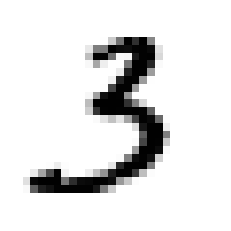

In [57]:
from random import randrange

test_data=pd.read_csv('test.csv')
lets_predict = test_data.values[:,:]

mu=np.mean(lets_predict)
sigma=np.std(lets_predict)

lets_predict=future_scaling(sigma,mu,lets_predict)

num=randrange(0,28001)
X_pred= (lets_predict[num,:])[np.newaxis,:]
disp_image(X_pred)
prd=predict(theta1,theta2,X_pred)
print('is it %s ?' %(prd[0,0])  )